# 1. Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Extract Data

In [16]:
path_loc = '/content/drive/MyDrive/Course Files/Course-Net/02. Kampus Merdeka/11. Time Series/'
df = pd.read_csv(path_loc+'daily_min_temp.csv',parse_dates=['Date'],index_col='Date')
df.head(14)

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


In [9]:
df.tail()

,Temp
Date,
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


In [10]:
df.shape

(3650, 1)

# 3. Visualisasi Data

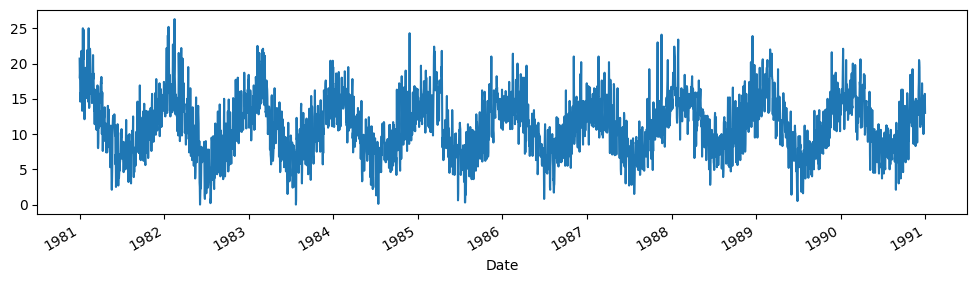

In [8]:
## Plot All Data
series = df['Temp']
series.plot(figsize=(12,3));

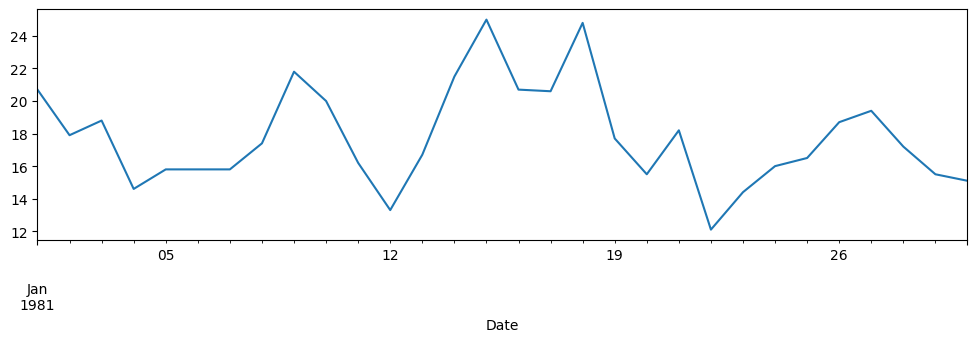

In [13]:
## Plot Data of First 30 days
series = df.Temp[:30]
series.plot(figsize=(12,3));

<Axes: xlabel='Date'>

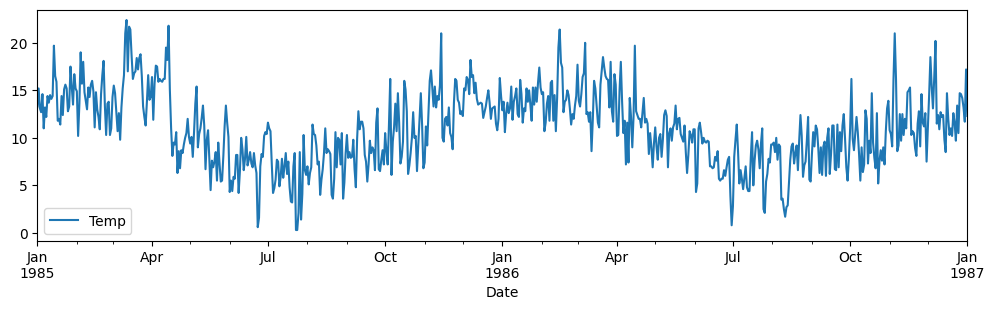

In [15]:
## Plot Data of Year 1985 & 1986
series = df[(df.index>='1985-01-01')&(df.index<='1987-01-01')]
series.plot(figsize=(12,3))

Data di atas merupakan seasonal data dengan periode 1 tahun, dimana temperatur naik di saat awal tahun lalu turun di pertengan tahun.

Karena data harian ini memiliki noise yang banyak, maka kita perlu transformasi datanya menjadi data mingguan/bulanan/tahunan untuk mengurangi noisenya.

# 4. Transformasi Data -> Resample

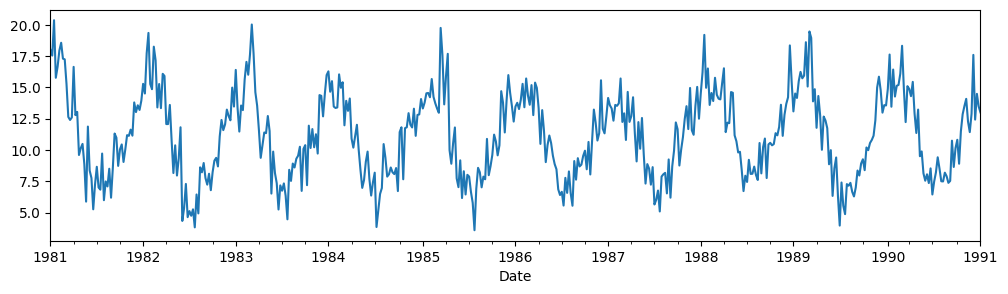

In [20]:
## transform menjadi weekly
df_weekly = df.resample("W").mean()
df_weekly.Temp.plot(figsize=(12,3));

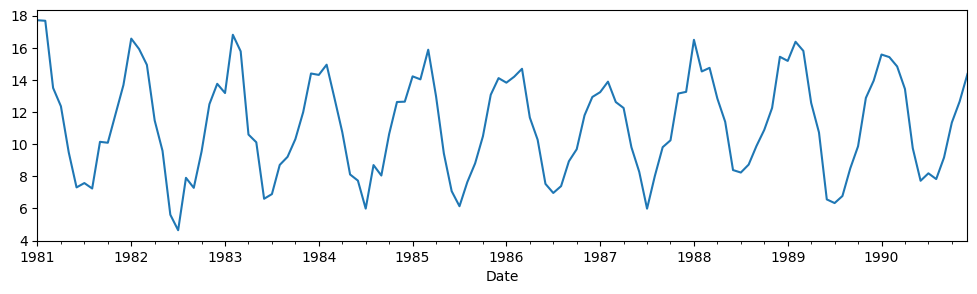

In [22]:
## transform menjadi monthly
df_monthly = df.resample("M").mean()
df_monthly.Temp.plot(figsize=(12,3));

# 5. Simple Forecasting

## 5.1. n-Shift
Data n waktu (hari/minggu/bulan/etc) ke depan sama dengan hari ini.

In [24]:
pred = df_weekly.copy()
pred = pred.shift(7)

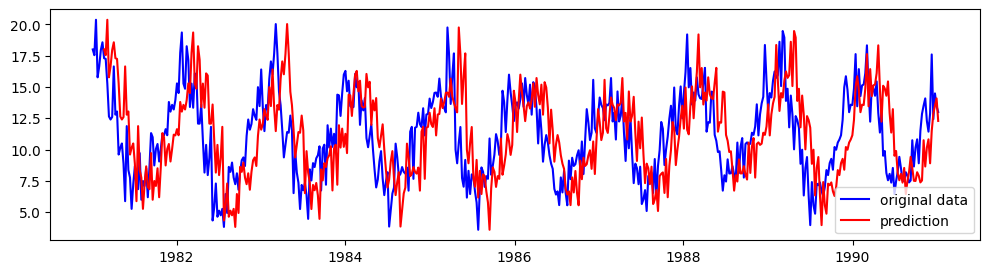

In [26]:
plt.figure(figsize=(12,3))
plt.plot(df_weekly,'b-',label='original data')
plt.plot(pred,'r-',label='prediction')
plt.legend();

## 5.2. Mean
memprediksi data berikutnya dengan menggunakan rata-rata data sebelumnya

In [35]:
## Ilustrasi
tanggal_1 = 3000
tanggal_2 = 3500
tanggal_3 = 4000

## Kita ingin memprediksi tanggal_4, so kita rata-ratakan data sebelumnya
tanggal_4 = np.mean([tanggal_1,tanggal_2,tanggal_3])
tanggal_4


## Kita ingin memprediksi tanggal_5, so kita rata-ratakan data sebelumnya
tanggal_5 = np.mean([tanggal_1,tanggal_2,tanggal_3,tanggal_4])
tanggal_5

3500.0

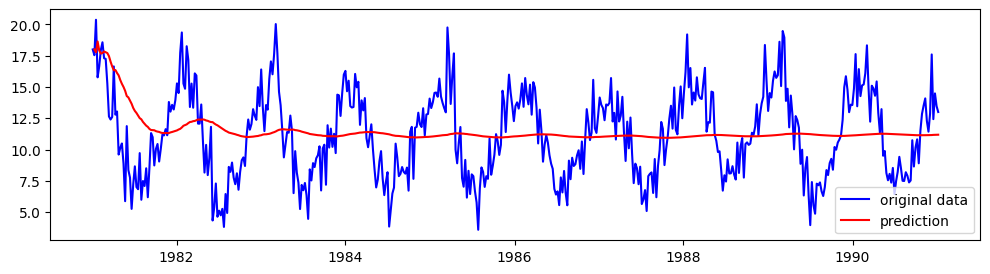

In [37]:
pred = df_weekly.copy()
pred.Temp = [df_weekly.loc[:date].Temp.mean() for date in df_weekly.index]
pred = pred.shift()

plt.figure(figsize=(12,3))
plt.plot(df_weekly,'b-',label='original data')
plt.plot(pred,'r-',label='prediction')
plt.legend();

## 5.3. Moving Average -> Rolling
menggunakan rata-rata n data sebelumnya

In [38]:
## Ilustrasi
## Let's say kita mau pakai 3 data sebelumnya yang mau di-average
tanggal_1 = 3000
tanggal_2 = 3500
tanggal_3 = 4000
tanggal_4 = 4500

## Kita ingin memprediksi tanggal_5, so kita ambil 3 data sebelumnya
tanggal_5 = np.mean([tanggal_2,tanggal_3,tanggal_4])
tanggal_5


## Kita ingin memprediksi tanggal_6, so kita ambil 3 data sebelumnya
tanggal_6 = np.mean([tanggal_3,tanggal_4,tanggal_5])
tanggal_6

4166.666666666667

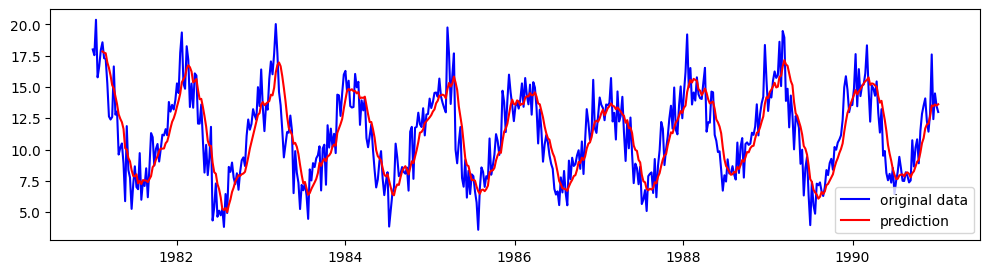

In [39]:
n = 7

pred = df_weekly.copy()
pred.Temp = pred.rolling(n).mean()

plt.figure(figsize=(12,3))
plt.plot(df_weekly,'b-',label='original data')
plt.plot(pred,'r-',label='prediction')
plt.legend();